<a href="https://colab.research.google.com/github/hjn14133/DSP/blob/main/DFT_Ploting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# first our usual bookkeeping
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (14,4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

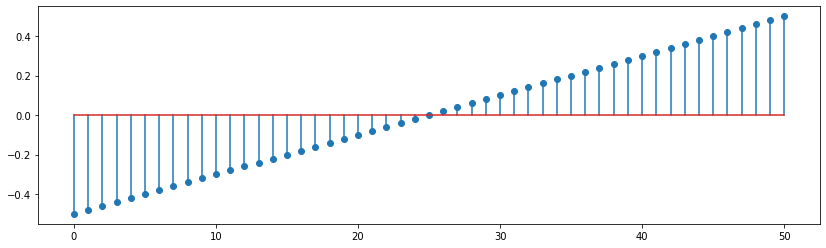

In [3]:
x = np.arange(0, 1.02, 0.02) - 0.5
plt.stem(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


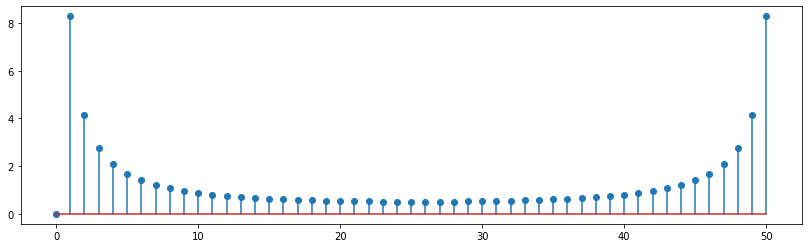

In [4]:
X = np.fft.fft(x);
plt.stem(abs(X));

In [5]:
# DFT shift function to differentiate between odd and even length signals
def dft_shift(X):
    N = len(X)
    if (N % 2 == 0):
        # even-length: return N+1 values
        return np.concatenate((X[(N/2):], X[:(N/2)+1]))
    else:
        # odd-length: return N values
        return np.concatenate((X[int((N+1)/2):], X[:int((N-1)/2)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


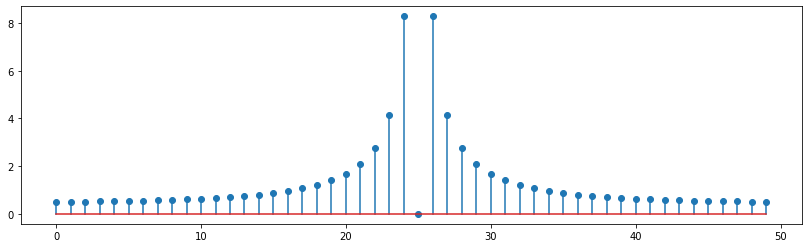

In [6]:
plt.stem(abs(dft_shift(X)));

In [7]:
# Change the DFT_shift function with correct values on x axis
def dft_shift(X):
    N = len(X)
    if (N % 2 == 0):
        # even-length: return N+1 values
        return np.arange(-int(N/2), int(N/2) + 1), np.concatenate((X[int(N/2):], X[:int(N/2)+1]))
    else:
        # odd-length: return N values
        return np.arange(-int((N-1)/2), int((N-1)/2) + 1), np.concatenate((X[int((N+1)/2):], X[:int((N+1)/2)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


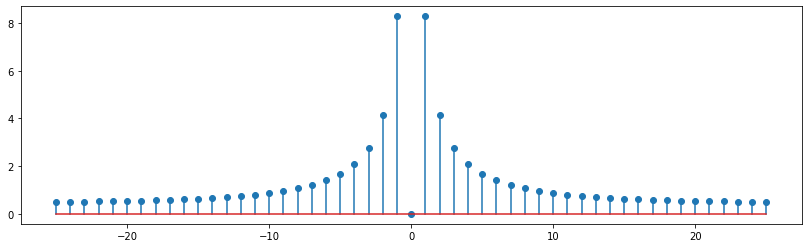

In [8]:
n, y = dft_shift(X)
plt.stem(n, abs(y));

In [ ]:
# Mapping the DFT index to real-world frequencies
import IPython
from scipy.io import wavfile
Fs, x = wavfile.read("piano.wav")
IPython.display.Audio(x, rate=Fs)

In [ ]:
# Remap the DFT coefficients using the sampling rate
def dft_map(X, Fs, shift=True):
    resolution = float(Fs) / len(X)
    if shift:
        n, Y = dft_shift(X)
    else:
        Y = X
        n = np.arange(0, len(Y))
    f = n * resolution
    return f, Y

In [ ]:
# let's cut the signal otherwise it's too big
x = x[:32768]
X = np.fft.fft(x);
f, y = dft_map(X, Fs)
plt.plot(f, abs(y));

In [ ]:
X = np.fft.fft(x);
f, y = dft_map(X, Fs, shift=False)
plt.plot(f[:2000], abs(y[:2000]));

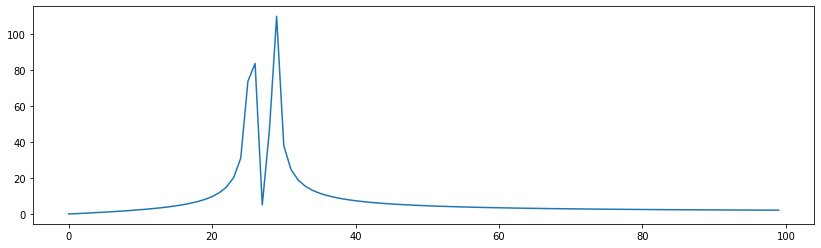

In [9]:
# Zero-padding - artificially extending a given dataset with zeros to the end of it
# To improve resolution
N = 256
Delta = 2*np.pi / N
n = np.arange(0, N)

# main frequency (not a multiple of the fundamental freq for the space)
omega = 2*np.pi / 10 

x = np.cos(omega * n) + np.cos((omega + 3*Delta) * n)
plt.plot(abs(np.fft.fft(x))[:100]);

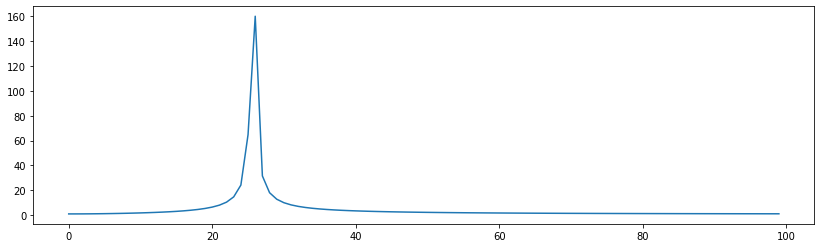

In [10]:
# A signal with two frequencies hard to apart and cannot be resovled by DFT
x = np.cos(omega * n) + np.cos((omega + 0.5*Delta) * n)
plt.plot(abs(np.fft.fft(x))[:100]);

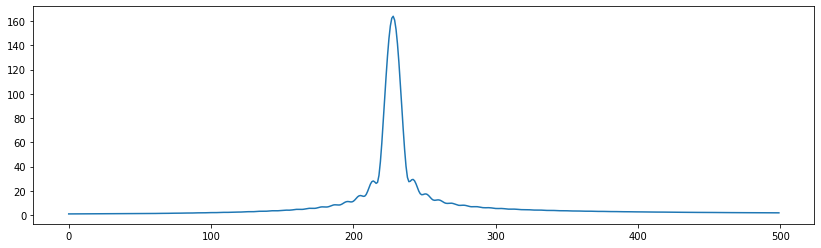

In [11]:
# Using Zero-padding, the plot can display as one peak
xzp = np.concatenate((x, np.zeros(2000)))
plt.plot(abs(np.fft.fft(xzp))[:500]);